In [1]:
import urllib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 # for subsampling the data
from random import sample

# for plotting on a geographic map
import folium 
from folium import plugins 
import mplleaflet

# Getting and inspecting the data

Downloading the data. At the moment, only data from June 2015 is considered.

In [2]:
# list containing the link(s) to the csv file(s)
data_links = ['https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-06.csv']

filenames = []
for link in data_links:
    filenames.append(link.split('/')[-1])
    if not(os.path.isfile(filenames[-1])): # do not download file if it already exists
        urllib.urlretrieve(link, filename)

Loading the data into a pandas data frame and look at it:

In [3]:
df = pd.DataFrame()
for filename in filenames:
    df = df.append(pd.read_csv(filename), ignore_index=True)

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0,0.5,0.00,0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0,0.5,1.00,0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0,0.5,2.20,0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0,0.5,2.86,0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0,0.5,0.00,0,0.3,10.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12324935 entries, 0 to 12324934
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.8+ GB


In [6]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000
mean,1.523565,1.681898,11.829076,-72.913847,40.166867,1.041832,-72.944737,40.184784,1.379517,13.204085,0.323405,0.497618,1.736538,0.316152,0.299721,16.378268
std,0.499444,1.335180,7678.550287,8.796762,4.843162,0.581957,8.669562,4.777574,0.499528,106.076575,0.480415,0.042148,2.637613,1.542573,0.012164,106.382788
min,1.000000,0.000000,0.000000,-759.233337,-67.136963,1.000000,-754.166687,-16.177874,1.000000,-300.000000,-30.500000,-0.500000,-80.000000,-14.000000,-0.300000,-300.000000
25%,1.000000,1.000000,1.010000,-73.991898,40.736141,1.000000,-73.991302,40.734627,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.760000
50%,2.000000,1.000000,1.750000,-73.981537,40.753235,1.000000,-73.979622,40.753799,1.000000,9.500000,0.000000,0.500000,1.160000,0.000000,0.300000,12.300000
75%,2.000000,2.000000,3.230000,-73.966461,40.767929,1.000000,-73.962479,40.768787,2.000000,15.000000,0.500000,0.500000,2.350000,0.000000,0.300000,18.300000
max,2.000000,9.000000,10083318.000000,149.028534,69.702576,99.000000,125.535568,483.450012,5.000000,335413.690000,652.420000,60.350000,980.910000,900.970000,0.700000,335414.490000


Note that some of the numerical features like tip amount and fare amount actually contain negative values. Those invalid values will be deleted in the next section.

# Data cleaning

### 1) Retaining only trips paid by credit card
Only the credit card tips are recorded in the data set. Therefore, let's only retain trips with credit card payment. This might introduce some bias (as credit card payers may have a different tipping behaviour than others).

As seen below, most of the trips are anyway paid by credit card (label "1", followed by cash payment, label "2").

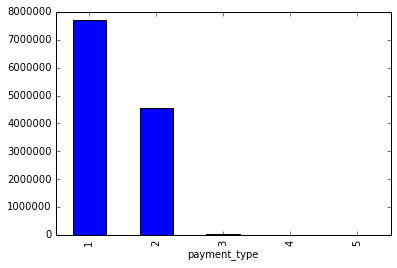

In [7]:
df.groupby('payment_type').size().plot(kind='bar');

For some trips, people actually tipped with credit card, even though they did not pay with credit card:

In [8]:
np.sum((df.payment_type != 1) & (df.tip_amount != 0))

388

However, the number of those trips is negligible, so I ignore them here and only retain credit card trips. Then, the column "payment_type" can be removed:

In [9]:
df = df[df.payment_type == 1]
df.drop('payment_type', axis=1, inplace=True)
df.shape

(7719300, 18)

### 2) Checking for unfeasible values in numerical features
As seen above, some of the numerical features contained negative values. Let's have a closer look...

In [10]:
(df < 0).sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
pickup_longitude         7610164
pickup_latitude                2
RateCodeID                     0
store_and_fwd_flag             0
dropoff_longitude        7623507
dropoff_latitude               1
fare_amount                   10
extra                          4
mta_tax                        6
tip_amount                     8
tolls_amount                   0
improvement_surcharge         10
total_amount                  11
dtype: int64

...and remove the corresponding rows where negative values do not make any sense:

In [11]:
col_names = ['total_amount', 'improvement_surcharge', 'tip_amount', 'mta_tax', 'extra', 'fare_amount']

# this removes all rows where at least one value of the columns in col_names is < 0
rows_to_keep = (df[col_names] >= 0).sum(axis=1) == len(col_names)
print 'removing '+ str((~rows_to_keep).sum()) + ' rows...'
df = df[rows_to_keep]

(df[col_names] < 0).sum() # check if it worked

removing 13 rows...


total_amount             0
improvement_surcharge    0
tip_amount               0
mta_tax                  0
extra                    0
fare_amount              0
dtype: int64

### 3) Deleting "invalid" trips
#### Inspecting trip distance

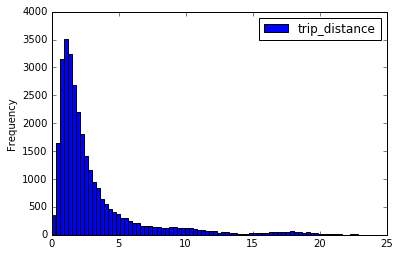

In [16]:
ax = df.loc[sample(df.index, 30000)].plot(y='trip_distance',kind='hist', bins=200)
ax.set_xlim([0,25]);

Delete trips that are longer than 50 miles...

In [18]:
rows_to_keep = df.trip_distance <= 50
print 'removing '+ str((~rows_to_keep).sum()) + ' rows...'
df = df[rows_to_keep]

removing 247 rows...


...and shorter than 0.1 miles:

In [19]:
rows_to_keep = df.trip_distance >= 0.1
print 'removing '+ str((~rows_to_keep).sum()) + ' rows...'
df = df[rows_to_keep]

removing 30086 rows...


#### Inspecting trip fare

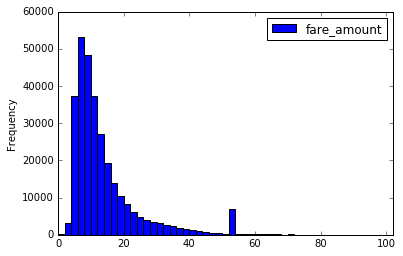

In [29]:
ax = df.loc[sample(df.index, 300000)].plot(y='fare_amount',kind='hist', bins=200)
ax.set_xlim([0,102]);

There seem to be a decent amount of trips with a fixed rate of 50 USD (see spike above).

Now let's remove rows where the fare is below 1 USD:

In [38]:
rows_to_keep = df.fare_amount >= 1
print 'removing '+ str((~rows_to_keep).sum()) + ' rows...'
df = df[rows_to_keep]

removing 274 rows...


#### Inspecting trip duration

In [39]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

In [40]:
df['trip_duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime 

In [41]:
df['trip_duration_minutes'] = df.trip_duration.dt.seconds/60

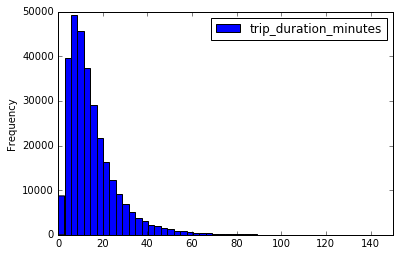

In [43]:
ax = df.loc[sample(df.index, 300000)].plot(y='trip_duration_minutes', kind='hist', bins=500)
ax.set_xlim([0,150]);

Remove trips that took less than half a minute...

In [45]:
rows_to_keep = df.trip_duration_minutes>0.5
print 'removing '+ str((~rows_to_keep).sum()) + ' rows...'
df = df[rows_to_keep]

removing 3625 rows...


...as well as trips with a duration of more than 2 hours:

In [46]:
rows_to_keep = df.trip_duration_minutes<=2*60
print 'removing '+ str((~rows_to_keep).sum()) + ' rows...'
df = df[rows_to_keep]

removing 5988 rows...


#### Inspecting passenger count

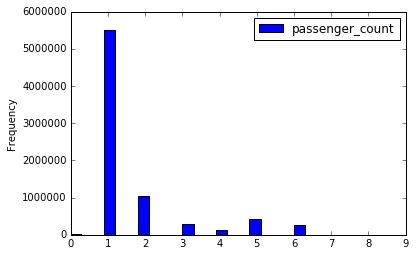

In [48]:
df.plot(y='passenger_count', kind='hist', bins=30);

Remove trips with zero passenger count:

In [49]:
rows_to_keep = df.passenger_count > 0
print 'removing '+ str((~rows_to_keep).sum()) + ' rows...'
df = df[rows_to_keep]

removing 784 rows...


Remove trips with a passenger count of more than 6:

In [50]:
rows_to_keep = df.passenger_count <= 6
print 'removing '+ str((~rows_to_keep).sum()) + ' rows...'
df = df[rows_to_keep]

removing 17 rows...


#### Removing invalid location coordinates
Remove trips that obviously did not start in NY:

In [51]:
within_NY = (df.pickup_latitude > 40) & (df.pickup_latitude < 40.9) & \
            (df.pickup_longitude > -74.4) & (df.pickup_longitude < -73.4)

print 'removing '+ str((~within_NY).sum()) + ' rows...'
df = df[within_NY]

removing 100456 rows...


Plot the pickup locations to check if they look good. Choose a random sample of all trips, since plotting all trips would take quite a while.

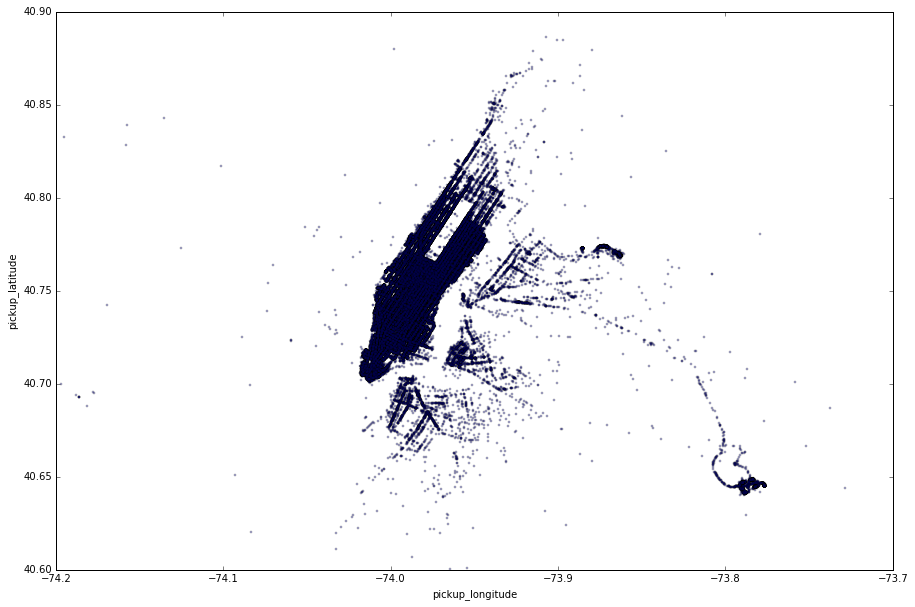

In [53]:
fig, ax = plt.subplots(figsize=(15, 10))
df.loc[sample(df.index, 200000)].plot(x='pickup_longitude', y='pickup_latitude', 
                                      kind='scatter', ax=ax, alpha=0.3, s=3)
ax.set_xlim([-74.2, -73.7])
ax.set_ylim([40.6, 40.9]);

The above plot looks reasonable, you can clearly identify the geometry of New York. Let's plot a small subset of data points on a map. Next to central NY, one can identify small hotspots at the surrounding airports.

In [92]:
subdf = df.loc[sample(df.index, 10000)] # subsample df 
data = subdf[['pickup_latitude', 'pickup_longitude']].values

mapa = folium.Map([40.7, -73.9], zoom_start=11, tiles='stamentoner') # create heatmap
mapa.add_children(plugins.HeatMap(data, min_opacity=0.005, max_zoom=18,
                                  max_val=0.01, radius=3, blur=3))
mapa

### Inspecting the tip
As the tip distribution below shows, people tend to tip whole numbers of dollars (see peaks at e.g. 1 and 2 dollars).

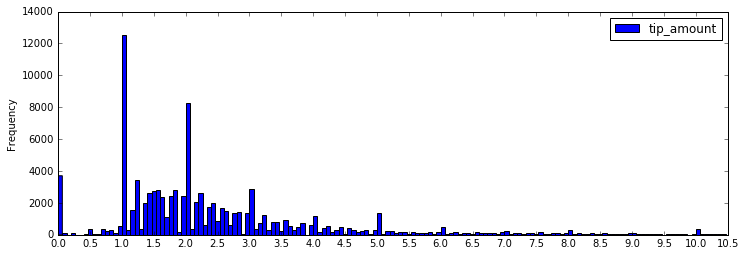

In [57]:
fig, ax = plt.subplots(figsize=(12,4))
ax = df.loc[sample(df.index, 100000)].plot(y='tip_amount', kind='hist',bins=1500, ax=ax)
ax.set_xlim([0,10.5])
ax.set_xticks(np.arange(0, 11, 0.5));

A useful metric for a taxi driver to compare tips is the percentage of tip given with respect to the total fare amount.

In [63]:
# check if the fares and fees sum up to total_amount
print pd.concat([df.tip_amount + df.fare_amount + df.tolls_amount + \
           df.extra + df.mta_tax  + df.improvement_surcharge, \
           df.total_amount], axis=1).head()

# calculate tip percentage
df['total_fare'] = df.total_amount - df.tip_amount
df['tip_percentage'] = df.tip_amount / df.total_fare * 100

       0  total_amount
1   8.30          8.30
2  11.00         11.00
3  17.16         17.16
5  10.55         10.55
6  16.30         16.30


The tip percentage distribution below shows that people mostly seem to tip 0, 20, 25 or 30%. 

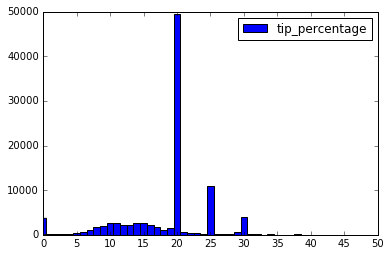

In [80]:
data = df.loc[sample(df.index, 100000)].tip_percentage.values
plt.hist(data, np.arange(min(data)-0.5, max(data)+1.5)) 
plt.gca().set_xlim([0,35])
plt.gca().set_xticks(np.arange(0, 51, 5));
plt.legend(['tip_percentage']);

Remove trips where a tip of more than 100% was recorded, regarding them as invalid outliers.

In [83]:
rows_to_keep = df.tip_percentage <= 100
print 'removing '+ str((~rows_to_keep).sum()) + ' rows...'
df = df[rows_to_keep]

removing 5015 rows...


In [31]:
df.tip_percentage.mean()

18.455572081937966

In [32]:
df.tip_percentage.median()

19.999999999999996

In [33]:
df.tip_percentage.mode()

0    20
dtype: float64

In [189]:
df.tip_percentage.quantile(0.25)

15.384615384615385

In [50]:
# fig, ax = plt.subplots(figsize=(14,5))
# ax = df.loc[sample(df.index, 100000)].tip_percentage.plot(kind='hist',bins=2000, cumulative=True)
# ax.set_xlim([0,200])

Tip percentage by day of the week (Monday=0, Sunday=6). People tend to tip a little less on weekends (day 5-6).

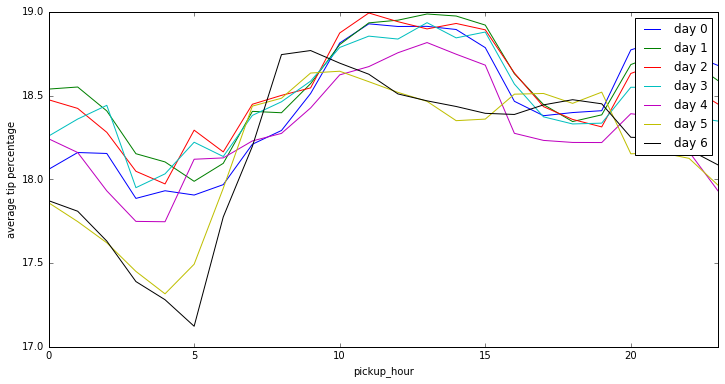

In [90]:
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(7):
    df[df.pickup_weekday==i].groupby('pickup_hour').mean().plot(y='tip_percentage', ax=ax)
plt.legend(['day ' + str(x) for x in range(7)])
ax.set_ylabel('average tip percentage')

Let's look at the number of trips per hour and day:

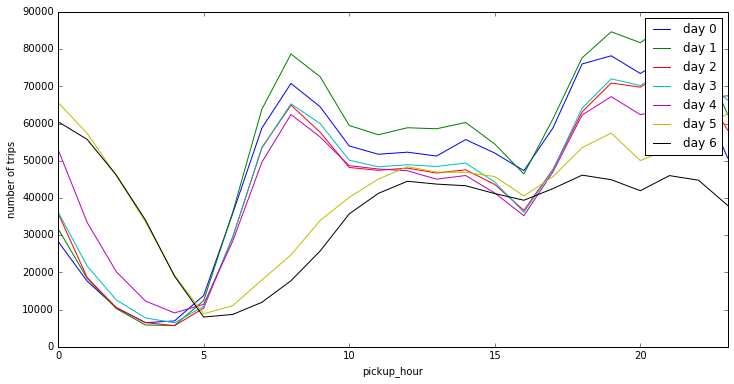

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(7):
    df[df.pickup_weekday==i].groupby('pickup_hour').size().plot(ax=ax)
plt.legend(['day ' + str(x) for x in range(7)])
ax.set_ylabel('number of trips')

The tip percentage does seem to depend too much on the number of passengers:

(15, 21)

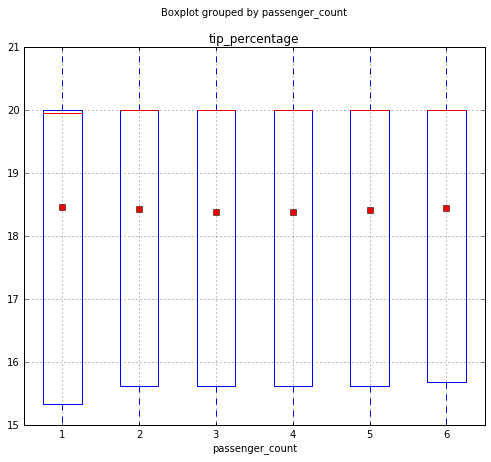

In [70]:
fig, ax = plt.subplots(figsize=(8,7))
df.boxplot('tip_percentage', by='passenger_count', showmeans=True, ax=ax)
ax.set_ylim([15,21])

Save the cleaned data frame to a file:

In [84]:
df.to_pickle('df.pickle')